# Vote Data Analysis from 2002 Irish General Election e-voting trial - Dublin West

In [1]:
#read vote data from csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math 

%matplotlib inline

#input file
#constituency="DublinNorth2002"
constituency="DublinWest2002"
#constituency="Meath2002"
my_csv='../data/'+constituency+'.csv'

#read in data (setting 1st row as header)
df = pd.read_csv(my_csv, na_values=["Missing"], header=[0])

#set column names as first line

#df.head()
print("Print Data Frame (df.head)")
print(df.head(10))
print("Print Column names")
print(df.columns)

#drop the numbers column (#df=df.drop(['No.'], 1))
df = df.drop(df.columns[[0]], axis=1)  # df.columns is zero-based pd.Index
#reset index to start a 1 and not 0
df.index = df.index + 1

Print Data Frame (df.head)
   Unnamed: 0   GP   LB   FF   SP  FF2   SF   PD   NP   FG
0           1  NaN  4.0  NaN  3.0  NaN  NaN  1.0  5.0  2.0
1           2  NaN  NaN  2.0  NaN  1.0  4.0  3.0  NaN  NaN
2           3  NaN  NaN  3.0  NaN  1.0  NaN  2.0  NaN  NaN
3           4  NaN  2.0  NaN  NaN  NaN  NaN  3.0  NaN  1.0
4           5  NaN  2.0  1.0  NaN  NaN  NaN  NaN  NaN  NaN
5           6  NaN  3.0  2.0  NaN  1.0  NaN  NaN  NaN  NaN
6           7  4.0  1.0  7.0  3.0  5.0  6.0  8.0  9.0  2.0
7           8  3.0  4.0  NaN  2.0  NaN  1.0  NaN  NaN  NaN
8           9  NaN  4.0  NaN  3.0  1.0  2.0  NaN  NaN  NaN
9          10  2.0  3.0  NaN  NaN  NaN  NaN  NaN  NaN  1.0
Print Column names
Index(['Unnamed: 0', 'GP', 'LB', 'FF', 'SP', 'FF2', 'SF', 'PD', 'NP', 'FG'], dtype='object')


# Election Dataset Describe and Info

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29988 entries, 1 to 29988
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GP      12194 non-null  float64
 1   LB      18189 non-null  float64
 2   FF      15495 non-null  float64
 3   SP      18151 non-null  float64
 4   FF2     19277 non-null  float64
 5   SF      11803 non-null  float64
 6   PD      15617 non-null  float64
 7   NP      5904 non-null   float64
 8   FG      16096 non-null  float64
dtypes: float64(9)
memory usage: 2.1 MB


In [3]:
df.describe()

,GP,LB,FF,SP,FF2,SF,PD,NP,FG
count,12194.000000,18189.000000,15495.000000,18151.000000,19277.000000,11803.000000,15617.000000,5904.000000,16096.000000
mean,4.276119,2.899720,3.301775,2.647292,2.471391,3.800474,3.435999,6.542344,3.281250
std,1.983101,1.650537,2.001627,1.852256,1.900288,2.524966,1.859125,2.129765,2.027303
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,5.000000,2.000000
50%,4.000000,3.000000,3.000000,2.000000,2.000000,3.000000,3.000000,7.000000,3.000000
75%,6.000000,4.000000,4.000000,3.000000,3.000000,5.000000,4.000000,8.000000,4.000000
max,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


# Statistics on election - candidates and votes

In [4]:
#Stats No. of Candidates(columns) and Votes(rows), all combinations of candidates = candidates!
print("Statistics on Dataframe")
candidates = len(df.columns)
print("No. of Candidates = ", candidates)
votes = len(df.index)
print("No. of Votes = ", votes)
print("No. of all possible Combinations (candidates)! = ", math.factorial(candidates))

Statistics on Dataframe
No. of Candidates =  9
No. of Votes =  29988
No. of all possible Combinations (candidates)! =  362880


## Additional Statistics on Actual Vote Data

In [5]:
import statistics as stats
df.head()
#print(df.describe())
df.max()
# find the maximum values of each row (the highest vote preference cast)
maxValues = df.max(axis = 1)
#print(maxValues)
#mean - average 
print(f"Average(Mean) value = {stats.mean(maxValues)}")
#mode - most frequent occuring value
print(f"Mode(most often number of votes cast = {stats.mode(maxValues)}")
#median - middle value
print(f"Middle value of votes cast = {stats.median(maxValues)}")


Average(Mean) value = 4.425970388155262
Mode(most often number of votes cast = 3.0
Middle value of votes cast = 4.0


## Calculate maximum values (number of preferences) for each vote(row)

In [6]:
#add a column of the maximum count of the rows(highest preference vote cast)
df['maxValues'] = df.max(axis = 1)

In [7]:
mval=(df['maxValues'].value_counts())
mval.sort_index(ascending=True, inplace=True)
print(mval.values)
print(mval.index)

[1743 3243 8753 5157 3389 1866 1027 1010 3800]
Float64Index([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0], dtype='float64')


# Plot Histogram of the number of transfers a voter casts

Float64Index([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0], dtype='float64')
[1743 3243 8753 5157 3389 1866 1027 1010 3800]
[0 1 2 3 4 5 6 7 8]


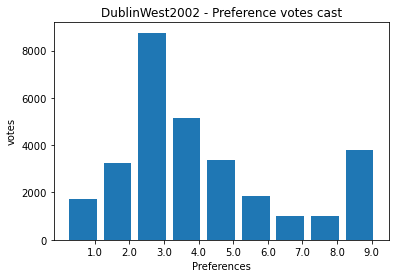

In [8]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

#counts = Counter(word_list)
#labels, values = zip(*counts.items())
# sort your values in descending order
#indSort = np.argsort(values)[::-1]

# rearrange your data
labels=mval.index
values=mval.values
indexes = np.arange(len(labels))
print(labels)
print(values)
print(indexes)

bar_width = 0.35

# Add title and axis names
plt.title(constituency+' - Preference votes cast')
plt.xlabel('Preferences')
plt.ylabel('votes')

plt.bar(indexes, values)

# add labels
plt.xticks(indexes + bar_width, labels)


# Save the histogram
plt.savefig('../images/'+constituency+'hist.png')

#show histogram
plt.show()

###Pie Chart of how many preferences a voter uses

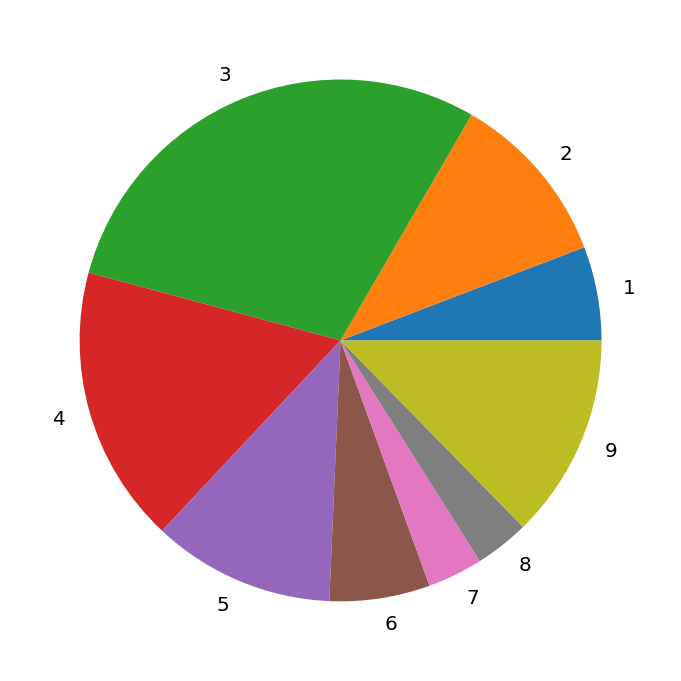

In [9]:
import matplotlib.pyplot as plt
import numpy as np
# Set the figure size - handy for larger output
#from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [10, 6]
# Set up with a higher resolution screen (useful on Mac)
%config InlineBackend.figure_format = 'retina'

pieLabels=[]
for lab in indexes:
    pieLabels.append(lab+1)

plt.pie(values, labels = pieLabels)

# Save the Pie
plt.savefig('../images/'+constituency+'_pref_cast_pie.png')

plt.show()

In [10]:
nPrList =[]
for i in range(1,candidates+1):
    nPrList.append(int(math.factorial(candidates)/(math.factorial(candidates-i))))
print(nPrList)

[9, 72, 504, 3024, 15120, 60480, 181440, 362880, 362880]


## Print number of preferences cast, and calculate percentage

In [11]:
# creating the dataframe from dictionary
d={"Pref": labels, "Votes": values}    
dfpref = pd.DataFrame(d)

#calculate percentage of preferences cast and add to dataframe
votz = dfpref.Votes.sum()  
dfpref['Percentage'] = round(((dfpref['Votes']/votz)*100), 1)

#calculate possible nPr = n!/(n-r)! values for each preference vote
# candidates = n. No. of pref = r
nPrList =[]
for i in range(1,candidates+1):
    nPrList.append(int(math.factorial(candidates)/(math.factorial(candidates-i))))
#add nPr to dataframe    
dfpref['nPr'] = nPrList

# displaying the dataframe
display(dfpref)

,Pref,Votes,Percentage,nPr
0,1.0,1743,5.8,9
1,2.0,3243,10.8,72
2,3.0,8753,29.2,504
3,4.0,5157,17.2,3024
4,5.0,3389,11.3,15120
5,6.0,1866,6.2,60480
6,7.0,1027,3.4,181440
7,8.0,1010,3.4,362880
8,9.0,3800,12.7,362880


# Calculate number of duplicated vote sequences

In [12]:
print((~df.duplicated()).sum())
print(df.duplicated(keep='last').value_counts())

10335
True     19653
False    10335
dtype: int64


In [13]:
#drop all dublicate rows keeping last one
df.drop_duplicates(keep='last', inplace=True, subset=df.columns.difference(['maxValues']))

In [14]:
#print the number of votes, and the number of unique votes
print(f"Number of votes {votes}")
print(f"Number of unique vote patterns (after removing duplicates) {len(df)}")

Number of votes 29988
Number of unique vote patterns (after removing duplicates) 10335


In [15]:
# after removal of duplicates
#add a column of the maximum count of the rows(highest preference vote cast)
df['maxValues'] = df.max(axis = 1)

mval=(df['maxValues'].value_counts())
mval.sort_index(ascending=True, inplace=True)

### calculate unique vote combinations for each preference cast 

In [16]:
#calculate unique vote combinations for each preference cast 
dfpref['Unique Votes'] = mval.values

dfpref['Percentage Used'] = round(((dfpref['Unique Votes']/dfpref['nPr'])*100), 5)

# displaying the dataframe
display(dfpref)

,Pref,Votes,Percentage,nPr,Unique Votes,Percentage Used
0,1.0,1743,5.8,9,9,100.00000
1,2.0,3243,10.8,72,71,98.61111
2,3.0,8753,29.2,504,406,80.55556
3,4.0,5157,17.2,3024,1115,36.87169
4,5.0,3389,11.3,15120,1785,11.80556
5,6.0,1866,6.2,60480,1505,2.48843
6,7.0,1027,3.4,181440,971,0.53516
7,8.0,1010,3.4,362880,978,0.26951
8,9.0,3800,12.7,362880,3495,0.96313


In [17]:
#just checking 
print(sum(mval.values))
nPr=dfpref['nPr']

10335


## Import in Political Compass data for Irish Parties

In [18]:
#download compass data positioning irish political parties on the political spectrum
pcData='../data/pc.csv'

#set column names
col_names = ['party', 'xaxis', 'yaxis']
#read in political compass data
dfPC = pd.read_csv(pcData, na_values=["Missing"], names=col_names)
print("Irish Parties on Political Compass")
print(dfPC)
points=[]
points = dfPC.party
x=[] #x-axis coordinates
y=[] #y-axis coordinates
pt=[]

#populate two lists with the x and y - coordinates
for p in points:
    pt.append(dfPC.party)
    x.append(dfPC.xaxis)
    y.append(dfPC.yaxis)

Irish Parties on Political Compass
  party  xaxis  yaxis
0    SP   -7.0   -2.5
1    SF   -4.5    1.0
2    GP   -1.0   -2.0
3    NP    0.0    0.0
4    LB    1.5   -0.5
5    FF    2.5    2.4
6    FG    3.5    2.5
7    PD    4.0    3.0


In [19]:
# get the party initials (1 characters) from the column names i.e. remove .1 .2 L Retc
#print(df.columns)
partiesList= list(df.columns)
del partiesList[-1]
print(partiesList)
partiesList2=[]
for pl in partiesList:
    #print(pl[:2] )
    partiesList2.append(pl[:2])
print(partiesList2)

['GP', 'LB', 'FF', 'SP', 'FF2', 'SF', 'PD', 'NP', 'FG']
['GP', 'LB', 'FF', 'SP', 'FF', 'SF', 'PD', 'NP', 'FG']


In [20]:
def getEuclidVoteDetails(voteRow, dfPC):
    #populate 3 lists with text, x co-ord and y co-ord
    partyPCList = dfPC.party.tolist()
   # print("partyList",partyPCList)
    xi=[]
    yi=[]
    pp=[]
    for d in voteRow:
        inx=partyPCList.index(d)
        pp.append(dfPC.iloc[inx].tolist()[0])
        xi.append(dfPC.iloc[inx].tolist()[1])
        yi.append(dfPC.iloc[inx].tolist()[2])

   # for ip in range(len(pp)):
   #     print(f"{ip+1} - {pp[ip]} ({xi[ip]}, {yi[ip]})")

    #Calculate the eculidean distance a vote travels on the political spectrum
    dist = 0
    total_dist=0
    big_dist=0
    for pl in range(len(pp)):
    # initializing points in # numpy arrays      
        if pl != (len(pp)-1):
            point1 = np.array((xi[pl],yi[pl]))
            point2 = np.array((xi[pl+1],yi[pl+1]))

    #calculating Euclidean distance # using linalg.norm()
            dist = np.linalg.norm(point1 - point2)
            #print(f"Euclidean distance between vote {pl+1} and {pl+2} is {dist}")
            total_dist = total_dist + dist
            if dist > big_dist:
                big_dist=dist
 #   print(total_dist, len(pp))
    if len(pp) > 1:
        avg_dist = total_dist/(len(pp)-1)    
    else:
        avg_dist = total_dist
    #print("Total Distance Travelled on Political Compass as a vote transfers ", total_dist)
    #print("Average Distance Travelled on Political Compass of each vote transfers ", avg_dist)

    return(total_dist, avg_dist, big_dist)

In [21]:
def getVotesParty(voterow, partieslegend):
    #convert a vote row into parties initials
    voteP=[]
    for v in range(len(voterow)):
        for w in range(len(voterow)):
            if voterow[w] == v+1:
                voteP.append(partieslegend[w])
    return(voteP)

In [22]:
#calculate the euclidean distance for all rows
EuclidDist = []
AvgEucDist =[]
BiggestDist =[]
for dft5 in range(len(df)):
    #print(dft5)
    dftR = list(df.iloc[dft5])
    del dftR[-1]
    #print("Call get Votes for Party in row")
    votePList=getVotesParty(dftR, partiesList2)
    #print(votePList)
    (tD, aD, bD) = getEuclidVoteDetails(votePList, dfPC)
    #print(tD, aD)
    EuclidDist.append(tD)
    AvgEucDist.append(aD)
    BiggestDist.append(bD)
    
#print(EuclidDist)
#print(AvgEucDist)
#print(type(EuclidDist))
df['Euclid Dist'] = np.array(EuclidDist)
df['Avg. Euc. Dist'] = np.array(AvgEucDist)
df['Biggest Dist'] = np.array(BiggestDist)
display(df.tail(10))


,GP,LB,FF,SP,FF2,SF,PD,NP,FG,maxValues,Euclid Dist,Avg. Euc. Dist,Biggest Dist
29979,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,0.000000,0.000000,0.000000
29980,7.0,3.0,2.0,8.0,1.0,6.0,4.0,9.0,5.0,9.0,34.278856,4.284857,8.139410
29981,8.0,4.0,6.0,1.0,5.0,3.0,2.0,NaN,7.0,8.0,37.651678,5.378811,12.298374
29982,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,9.279437,4.639718,6.363961
29983,7.0,1.0,6.0,5.0,4.0,8.0,3.0,9.0,2.0,9.0,42.148523,5.268565,10.689247
29984,4.0,2.0,NaN,5.0,NaN,NaN,3.0,NaN,1.0,5.0,20.998579,5.249645,7.071068
29985,NaN,1.0,5.0,NaN,3.0,NaN,4.0,NaN,2.0,5.0,7.841638,1.960409,3.605551
29986,9.0,3.0,5.0,2.0,6.0,4.0,7.0,8.0,1.0,9.0,42.536731,5.317091,11.629703
29987,6.0,5.0,2.0,NaN,1.0,NaN,4.0,NaN,3.0,6.0,8.928733,1.785747,4.301163
29988,3.0,4.0,NaN,NaN,1.0,NaN,NaN,NaN,2.0,4.0,10.284425,3.428142,6.363961


Text(0.5, 0, 'Euclid Distance')

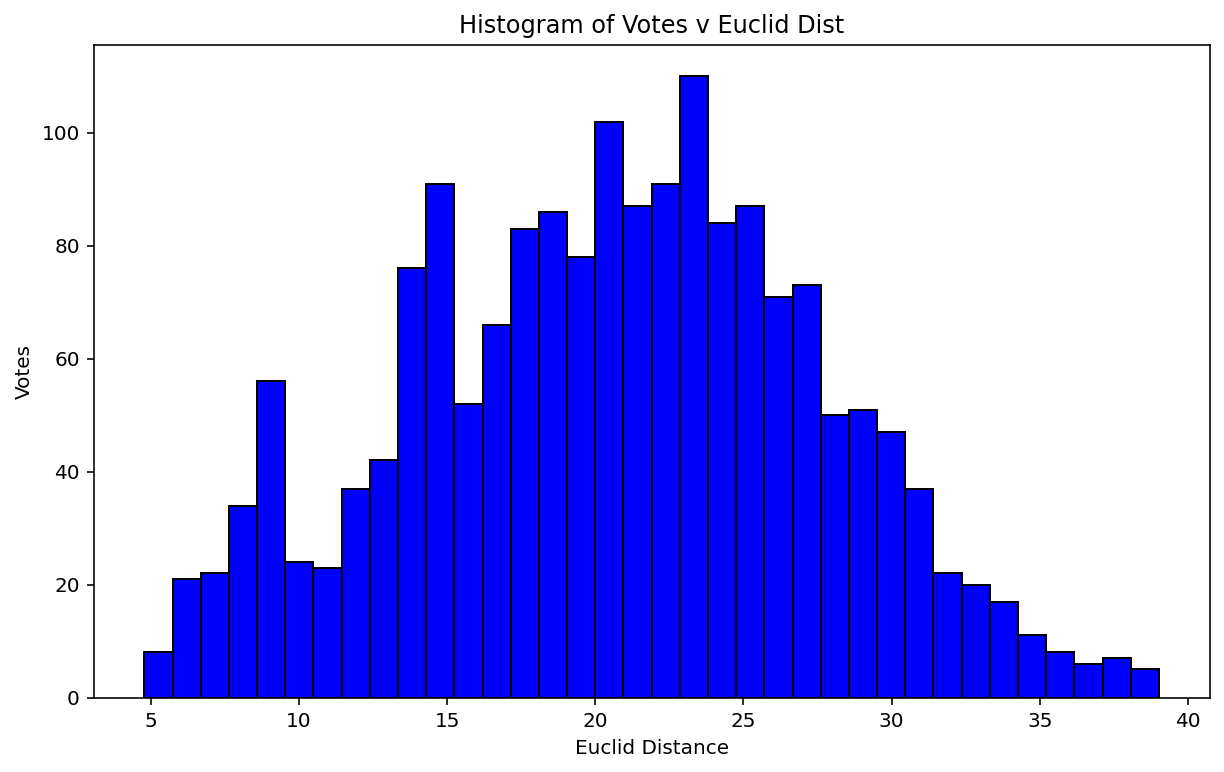

In [23]:
# Import the libraries
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib histogram
dfmh = pd.DataFrame()
dfmh = df.loc[df['maxValues']==5.0]

plt.hist(dfmh['Euclid Dist'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))

dfh= pd.DataFrame()
dfh['maxValues'] = df['maxValues']
dfh['Euclid Dist'] = df['Euclid Dist']
dfh['Avg. Euc. Dist'] = df['Avg. Euc. Dist']

# Plot Histogram
#sns.histplot(data = dfh, x = dfh['Euclid Dist'], kde = True, hue = dfh['maxValues'])

# seaborn histogram
#sns.distplot(df['Euclid Dist'], hist=True, kde=False, 
#             bins=int(180/5), color = 'blue',
#             hist_kws={'edgecolor':'black'})

#sns.histplot(data = df['Euclid Dist'])

# Add labels
plt.title('Histogram of Votes v Euclid Dist')
plt.ylabel('Votes')
plt.xlabel('Euclid Distance')

/anaconda38/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


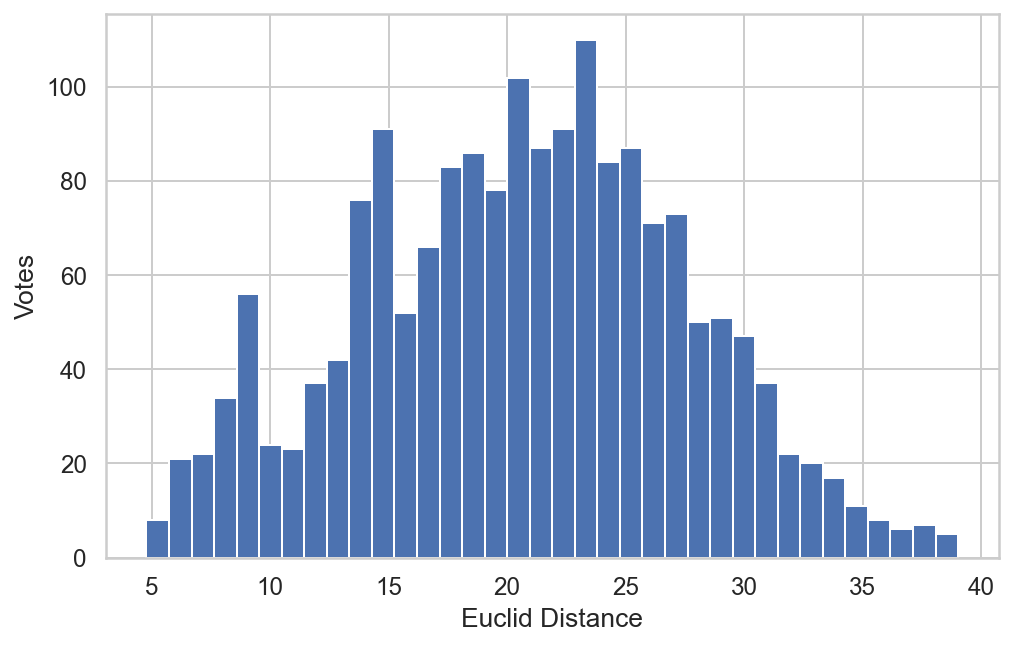

In [24]:
import seaborn as sns

sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    dfmh['Euclid Dist'], norm_hist=False, kde=False, bins=36, hist_kws={"alpha": 1}
).set(xlabel='Euclid Distance', ylabel='Votes');

In [25]:
df.fillna(0)
plist= list(df.columns)
plist2=plist[:-3]
print(plist2)
print(df[plist2].head())


['GP', 'LB', 'FF', 'SP', 'FF2', 'SF', 'PD', 'NP', 'FG', 'maxValues']
     GP   LB   FF   SP  FF2   SF   PD   NP   FG  maxValues
7   4.0  1.0  7.0  3.0  5.0  6.0  8.0  9.0  2.0        9.0
16  7.0  5.0  3.0  9.0  2.0  8.0  1.0  6.0  4.0        9.0
18  NaN  3.0  1.0  5.0  2.0  4.0  NaN  NaN  NaN        5.0
22  6.0  1.0  7.0  3.0  4.0  NaN  5.0  8.0  2.0        8.0
25  5.0  3.0  8.0  1.0  9.0  7.0  4.0  6.0  2.0        9.0


In [26]:
df.shape

(10335, 13)

In [27]:
#df['maxValues'].hist(bins=15, figsize=(15, 6), layout=(10335, 12));

In [28]:
# calculate the avg, mean median min and max of the euclidean distance for each preference 
dfeucmean =  df.groupby('maxValues')['Euclid Dist'].mean()
dfeucmedian =  df.groupby('maxValues')['Euclid Dist'].median()
#dfeucmode =  df.groupby('maxValues')['Euclid Dist'].mode() # no mode

In [29]:
dfeucmin =  df.groupby('maxValues')['Euclid Dist'].min()
dfeucmax =  df.groupby('maxValues')['Euclid Dist'].max()

In [30]:
#convert list to numpy array since lists seem to add at row 1 not 0
dfpref['Euc Mean'] = np.array(dfeucmean)
dfpref['Euc Median'] = np.array(dfeucmedian)
dfpref['Euc Min']  = np.array(dfeucmin)
dfpref['Euc Max']  = np.array(dfeucmax)

## Display the Statistics Table of the Vote

In [31]:
# displaying the dataframe
display(dfpref)

,Pref,Votes,Percentage,nPr,Unique Votes,Percentage Used,Euc Mean,Euc Median,Euc Min,Euc Max
0,1.0,1743,5.8,9,9,100.00000,0.000000,0.000000,0.000000,0.000000
1,2.0,3243,10.8,72,71,98.61111,5.216639,4.609772,0.000000,12.298374
2,3.0,8753,29.2,504,406,80.55556,10.630515,10.347674,1.004988,23.928077
3,4.0,5157,17.2,3024,1115,36.87169,15.693829,15.591789,1.712094,32.660202
4,5.0,3389,11.3,15120,1785,11.80556,20.639636,20.912195,4.779667,39.024163
5,6.0,1866,6.2,60480,1505,2.48843,24.650568,24.855250,7.413707,44.320314
6,7.0,1027,3.4,181440,971,0.53516,29.807767,29.940740,9.674254,47.138754
7,8.0,1010,3.4,362880,978,0.26951,34.041617,34.134147,15.689524,54.967032
8,9.0,3800,12.7,362880,3495,0.96313,38.479455,38.572389,18.656349,58.002974


### Write Statistics table to csv file

In [32]:
#filename and dir
out_csv='../data/stats/'+constituency+'_statistics.csv'

#write to csv file
dfpref.to_csv(out_csv)

### write out the dataframe with generated fields, categorise sequence as regular (1)

In [33]:
#add column with 
df['Seq']=1

#filename and dir
out_csv='../data/processed/'+constituency+'_reg.csv'
display(df.head(10))

#write to csv file
df.to_csv(out_csv)

,GP,LB,FF,SP,FF2,SF,PD,NP,FG,maxValues,Euclid Dist,Avg. Euc. Dist,Biggest Dist,Seq
7,4.0,1.0,7.0,3.0,5.0,6.0,8.0,9.0,2.0,9.0,47.771133,5.971392,11.629703,1
16,7.0,5.0,3.0,9.0,2.0,8.0,1.0,6.0,4.0,9.0,18.954230,2.369279,4.609772,1
18,NaN,3.0,1.0,5.0,2.0,4.0,NaN,NaN,NaN,5.0,13.553393,3.388348,6.184658,1
22,6.0,1.0,7.0,3.0,4.0,NaN,5.0,8.0,2.0,8.0,43.698941,6.242706,11.629703,1
25,5.0,3.0,8.0,1.0,9.0,7.0,4.0,6.0,2.0,9.0,40.591953,5.073994,11.629703,1
27,4.0,2.0,6.0,9.0,5.0,7.0,1.0,8.0,3.0,9.0,39.074386,4.884298,7.433034,1
31,5.0,NaN,3.0,4.0,1.0,2.0,NaN,NaN,NaN,5.0,30.987299,7.746825,10.689247,1
33,7.0,6.0,2.0,5.0,1.0,3.0,NaN,4.0,8.0,8.0,37.192995,5.313285,8.732125,1
36,5.0,4.0,3.0,NaN,2.0,1.0,NaN,NaN,6.0,6.0,19.485637,3.897127,7.138627,1
38,4.0,5.0,6.0,3.0,2.0,1.0,8.0,NaN,7.0,8.0,31.543814,4.506259,10.689247,1


### Bar Plot of the Percentages of Preferenes Cast v Possible Preferences

In [34]:
# Set the figure size - handy for larger output
plt.rcParams["figure.figsize"] = [10, 6]
# Set up with a higher resolution screen (useful on Mac)
%config InlineBackend.figure_format = 'retina'

#create data frame for bar chart
plotdata = pd.DataFrame([], 
    index=pieLabels
)
plotdata['Cast']=list(dfpref['Unique Votes'])
plotdata['nPr']=list(dfpref['nPr'])

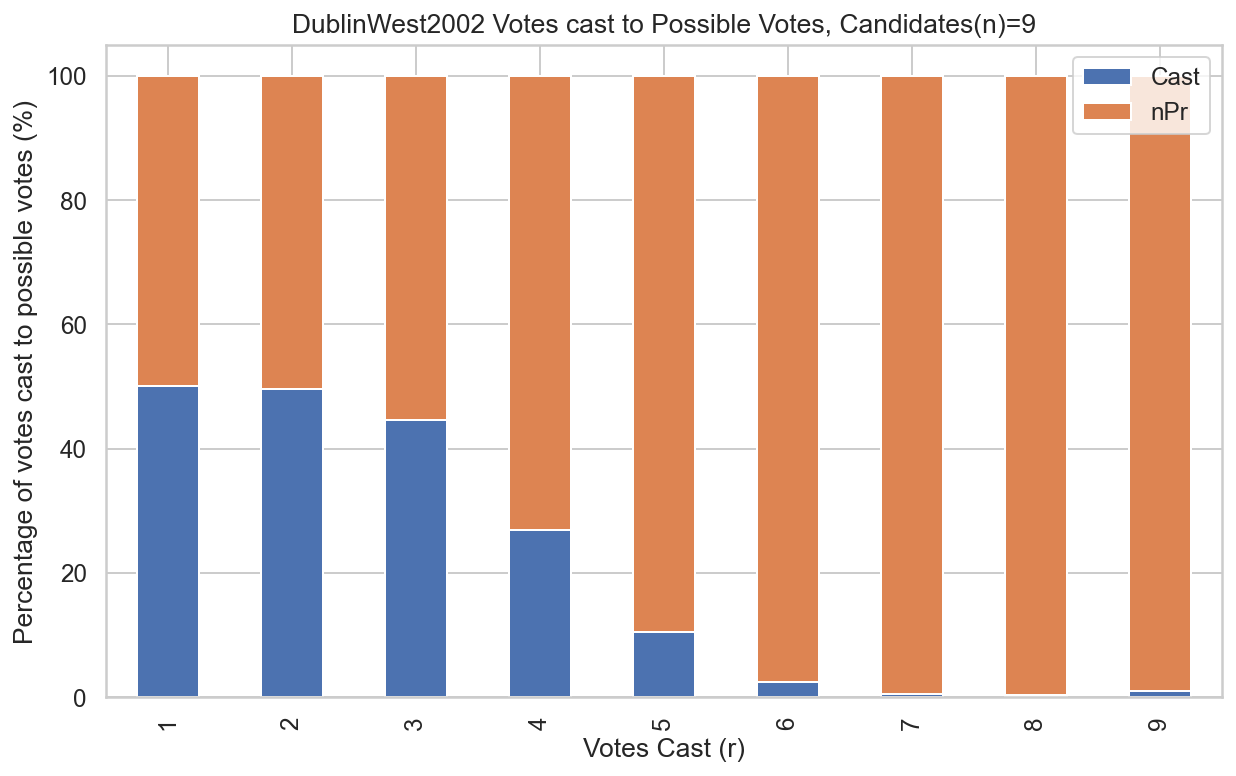

In [35]:
stacked_data = plotdata.apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="bar", stacked=True)
plt.title(constituency + " Votes cast to Possible Votes, Candidates(n)=9")
plt.xlabel("Votes Cast (r)")
plt.ylabel("Percentage of votes cast to possible votes (%)")

# Save the bar
plt.savefig('../images/'+constituency+'_pref_percent_bar.png')
plt.show()

In [36]:
print(dfpref['Euc Max'])

0     0.000000
1    12.298374
2    23.928077
3    32.660202
4    39.024163
5    44.320314
6    47.138754
7    54.967032
8    58.002974
Name: Euc Max, dtype: float64


In [37]:
df.loc[(df['Avg. Euc. Dist'] > 5.0) & (df['maxValues']==7.0)]

,GP,LB,FF,SP,FF2,SF,PD,NP,FG,maxValues,Euclid Dist,Avg. Euc. Dist,Biggest Dist,Seq
59,6.0,NaN,5.0,1.0,2.0,4.0,7.0,NaN,3.0,7.0,39.665617,6.610936,10.689247,1
117,3.0,5.0,6.0,2.0,NaN,4.0,NaN,7.0,1.0,7.0,34.978048,5.829675,11.629703,1
150,6.0,4.0,5.0,2.0,7.0,NaN,1.0,NaN,3.0,7.0,41.845755,6.974293,12.298374,1
165,5.0,7.0,NaN,1.0,2.0,3.0,6.0,NaN,4.0,7.0,43.703476,7.283913,10.689247,1
203,4.0,1.0,NaN,2.0,6.0,NaN,5.0,7.0,3.0,7.0,38.877951,6.479658,11.629703,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29829,7.0,3.0,5.0,2.0,1.0,4.0,6.0,NaN,NaN,7.0,41.431275,6.905212,10.689247,1
29858,5.0,3.0,7.0,6.0,1.0,NaN,2.0,NaN,4.0,7.0,32.596269,5.432711,10.689247,1
29877,3.0,5.0,6.0,1.0,NaN,4.0,2.0,7.0,NaN,7.0,36.696989,6.116165,12.298374,1
29904,7.0,5.0,6.0,3.0,4.0,NaN,1.0,NaN,2.0,7.0,34.783479,5.797246,11.629703,1


In [38]:
df.loc[(df['Euclid Dist'] > 46.3) & (df['maxValues']==7.0)]

,GP,LB,FF,SP,FF2,SF,PD,NP,FG,maxValues,Euclid Dist,Avg. Euc. Dist,Biggest Dist,Seq
4446,6.0,1.0,5.0,2.0,3.0,4.0,7.0,NaN,NaN,7.0,46.391971,7.731995,10.689247,1
29687,4.0,1.0,NaN,2.0,NaN,6.0,5.0,7.0,3.0,7.0,47.138754,7.856459,11.629703,1


In [39]:
dfn = pd.DataFrame()
dfn['Preferences'] = dfpref['Pref']
dfn['Permutations(nPr)'] = dfpref['nPr']
dfn['Unique Votes'] = dfpref['Unique Votes']
dfn['Available Permutations'] = dfpref['nPr'] - dfpref['Unique Votes']
display(dfn)

,Preferences,Permutations(nPr),Unique Votes,Available Permutations
0,1.0,9,9,0
1,2.0,72,71,1
2,3.0,504,406,98
3,4.0,3024,1115,1909
4,5.0,15120,1785,13335
5,6.0,60480,1505,58975
6,7.0,181440,971,180469
7,8.0,362880,978,361902
8,9.0,362880,3495,359385
